# Nonconvex scalar Conservation Laws

The scalar nonlinear conservation law $q_t + f(q)_x = 0$ is said to be "genuinely nonlinear" over some range of states between $q_\ell$ and $q_r$ if $f''(q) \neq 0$ for all $q$ between these values.  This is true in particular if $f(q)$ is any quadratic function; for example, the flux function for Burgers' equation and the LWR traffic flow model are genuinely nonlinear for all $q$.  The reason this is important is that it means that the characteristic speed $f'(q)$ is either monotonically increasing or monotonically decreasing over the interval between $q_\ell$ and $q_r$.  As discussed already in chapters [Burgers](Burgers.ipynb) and [Traffic_flow](Traffic_flow.ipynb), if $f'(q)$ is increasing as $q$ varies from $q_\ell$ to $q_r$ then the initial discontinuity of a Riemann problem spreads out into a smooth single-valued rarefaction wave.  On the other hand if $f'(q)$ is decreasing then the discontinuity propagates as a single shock wave with speed given by the Rankine-Hugoniot condition.  Hence the Riemann solution for a genuinely nonlinear scalar equation always consists of either a single rarefaction wave or a single shock.

The solution can be much more complicated if $f''(q)$ vanishes somewhere between $q_\ell$ and $q_r$, since this means that the characteristic speed may not vary monotonically.  As we will illustrate below, for a scalar conservation law of this type the solution to the Riemann problem might consist of multiple shocks and rarefaction waves.  These waves all originate from $x=0$ and the Riemann solution is still a similarity solution $q(x,t) = Q(x/t)$ for some single-valued function $Q(\xi)$, but determining the correct set of waves is more challenging.

In this chapter, we focus on *scalar nonconvex* problems and present results computed using an elegant form of the exact solution for a general scalar conservation laws due to Osher.  At the end of the chapter we comment briefly on implications for systems of equations.

## Osher's Solution

In this chapter we use Osher's general solution to the scalar nonlinear Riemann problem (valid also for nonconvex fluxes), using the formula from <cite data-cite="osher1984"><a href="riemann.html#osher1984">(Osher 1984)</a></cite>.  The Riemann solution is always a similarity solution $q(x,t) = Q(x/t)$ for all $t>0$ (constant on any ray $x=\alpha t$ eminating from the origin, for any constant $\alpha$).  The function $Q(\xi)$ is given by

$$
Q(\xi) = \begin{cases} 
    \text{argmin}_{q_\ell \leq q \leq q_r} [f(q) - \xi q]& \text{if} ~q_\ell\leq q_r,\\
    \text{argmax}_{q_r \leq q \leq q_\ell} [f(q) - \xi q]& \text{if} ~q_r\leq q_\ell.\\
\end{cases}
$$

Recall that $\text{argmin}_{q_\ell \leq q \leq q_r} G(q)$ returns the value of $q$ for which $G(q)$ is minimized over the indicated interval, while argmax returns the value of $q$ where $G(q)$ is maximized.
For more discussion, see also Section 16.1 of <cite data-cite="fvmhp"><a href="riemann.html#fvmhp">(LeVeque 2002)</a></cite>.

In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
from ipywidgets import widgets, fixed
from ipywidgets import interact
from exact_solvers import nonconvex
from exact_solvers import nonconvex_demos
import matplotlib.pyplot as plt
import copy

*** Warning: JSAnimation not found
*** Warning: JSAnimation not found


If you wish to examine the Python code for this chapter, please see:

 - [exact_solvers/nonconvex.py](exact_solvers/nonconvex.py) ...
   [on github,](https://github.com/clawpack/riemann_book/blob/FA16/exact_solvers/nonconvex.py)
 - [exact_solvers/nonconvex_demos.py](exact_solvers/nonconvex_demos.py) ...
   [on github.](https://github.com/clawpack/riemann_book/blob/FA16/exact_solvers/nonconvex_demos.py)


Note that in [exact_solvers/nonconvex.py](exact_solvers/nonconvex.py) we use the function `osher_solution` to define a function `nonconvex_solutions` that evaluates this solution at a set of `xi = x/t` values.  It also computes the possibly multi-valued solution that would be obtained by tracing characteristics, for plotting purposes.  In [exact_solvers/nonconvex_demos.py](exact_solvers/nonconvex_demos.py), an additional function `make_plot_function` returns a plotting function for use in interactive widgets below.  

## Traffic flow

First we recall that the Riemann solution for a problem with convex flux consists of a single shock or rarefaction wave.  For example, consider the flux function $f(q) = q(1-q)$ from traffic flow (with $q$ now representing the density $\rho$ that was used in [Traffic_flow](Traffic_flow.ipynb)).

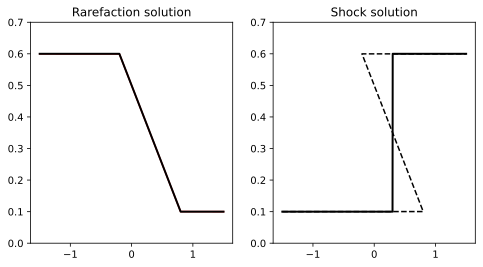

In [3]:
nonconvex_demos.demo1()

The plot on the left above shows a case where the solution is a rarefaction wave that can be computed by tracing characteristics.  On the right we see the case for which tracing characteristics would give an multivalued solution (as a dashed line) whereas the correct Riemann solution consists of a shock wave (solid line).  As discussed in [Traffic_flow](Traffic_flow.ipynb), the shock location is determined by the Rankine-Hugniot condition, or, equivalently, by the equal area condition discussed in [Burgers](Burgers.ipynb).

For comparison with later examples, we also plot the quadratic flux function $f(q)$ and the linear characteristic speed $f'(q)$ for this range of $q$ values.  Plotting $q$ vs. the characteristic speed shows how we can interpret each value of $q$ in the jump discontinuity (represented by the dashed vertical line in the plot on the right below) as propagating to the left or right at its characteristic speed.  Since $f'(q)$ is linear in $q$, the rarefaction wave shown above is piecewise linear. 

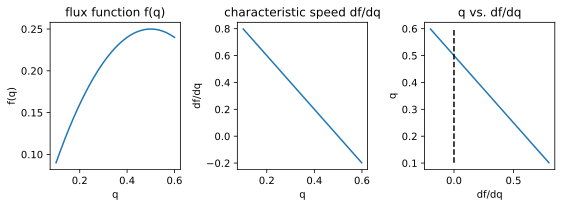

In [4]:
f = lambda q: q*(1-q)
q_left = 0.1
q_right = 0.6
nonconvex_demos.plot_flux(f, q_left, q_right)

## Buckley-Leverett Equation

The Buckley-Leverett equation for two-phase flow is described in Section 16.1.1 of <cite data-cite="fvmhp"><a href="riemann.html#fvmhp">(LeVeque 2002)</a></cite>.  It has the non-convex flux function

$$ 
f(q) = \frac{q^2}{q^2 + a(1-q)^2}
$$
where $a$ is some constant, $q=1$ corresponds to pure water and $q=0$ to pure oil, in a saturated porous medium. 

Here we make plots like the ones above, but for the Buckley-Leverett flux.

In [5]:
class BuckleyLeverett:
    def __init__(
        self,
        wettability: str,
        a,
        b,
        c,
        k_rw_max,
        k_ro_max,
        s_or,
        s_wc,
        s_w_cross,
        s_w_asterisco,
        p_c_max,
        M,
        s_w_i,
        s_w_domain_max,
        s_w_domain_min=0.10000001,
        # buoyancy-related parameters
        K=1e-12,               # absolute permeability [m^2]
        delta_rho=300,       # rho_w - rho_o [kg/m^3]
        g_x=9.81,             # gravity along x [m/s^2]
        mu_w=1e-3,            # water viscosity [Pa·s]
        q_t=1e-6,             # total Darcy flux [m/s]
    ):
        """
        wettability: wettability of the porous medium
        a: exponent of water relative permeability (van Genuchten / Corey)
        b: exponent of oil relative permeability
        c: exponent of capillary pressure
        k_rw_max: maximum water relative permeability
        k_ro_max: maximum oil relative permeability
        s_or: residual oil saturation
        s_wc: connate water saturation
        s_w_cross: water saturation at krw = kro (cross-over)
        s_w_asterisco: water saturation at critical oil saturation (Pc = 0)
        p_c_max: maximum capillary pressure
        M: viscosity ratio mu_o / mu_w
        s_w_i: initial water saturation
        s_w_domain_max: maximum water saturation in S_w grid
        s_w_domain_min: minimum water saturation in S_w grid

        # Buoyancy-related parameters (optional; only needed if using N_vg)
        K: absolute permeability [m^2]
        delta_rho: rho_w - rho_o [kg/m^3]
        g_x: gravity component along x [m/s^2]
        mu_w: water viscosity [Pa·s]
        q_t: total Darcy flux [m/s]
        """
        self.wettability = wettability
        self.a = a
        self.b = b
        self.c = c
        self.k_rw_max = k_rw_max
        self.k_ro_max = k_ro_max
        self.s_or = s_or
        self.s_wc = s_wc
        self.s_w_cross = s_w_cross
        self.s_w_asterisco = s_w_asterisco
        self.p_c_max = p_c_max
        self.M = M  # mu_o / mu_w
        self.s_w_i = s_w_i
        self.s_w_domain_max = s_w_domain_max
        self.s_w_domain_min = s_w_domain_min

        # Buoyancy-related
        self.K = K
        self.delta_rho = delta_rho
        self.g_x = g_x
        self.mu_w = mu_w
        self.q_t = q_t

    def effective_saturation(self, s_w):
        """
        Effective water saturation S_e = (S_w - S_wc) / (1 - S_wc - S_or)
        """
        return (s_w - self.s_wc) / (1 - self.s_wc - self.s_or)

    def k_rw(self, s_w):
        """
        Water relative permeability k_rw(S_w).
        """
        S_e = self.effective_saturation(s_w)
        return self.k_rw_max * (S_e ** self.a)

    def k_ro(self, s_w):
        """
        Oil relative permeability k_ro(S_w).
        """
        S_e = self.effective_saturation(s_w)
        return self.k_ro_max * ((1 - S_e) ** self.b)

    def capillary_pressure(self, s_w):
        """
        Pc(S_w) using a van Genuchten-like parametrization.
        """
        num = (self.s_w_asterisco / self.s_w_i) ** (-self.c) - (s_w / self.s_w_i) ** (-self.c)
        den = (self.s_w_asterisco / self.s_w_i) ** (-self.c) - 1.0
        return self.p_c_max * num / den

    def flux(self, s_w):
        """
        Fractional flow without buoyancy:
        f_w = 1 / (1 + (mu_w k_ro) / (mu_o k_rw))
            = 1 / (1 + (1/M) * (k_ro/k_rw))
        """
        kro = self.k_ro(s_w)
        krw = self.k_rw(s_w)
        return 1.0 / (1.0 + (1.0 / self.M) * (kro / krw))

    def N_vg(self):
        """
        Gravity-to-viscous ratio N_gv = K (rho_w - rho_o) g_x / (mu_o q_t).

        Here mu_o = M * mu_w.  N_gv is independent of S_w; s_w is ignored.
        """

        mu_o = self.M * self.mu_w
        return (self.K * self.delta_rho * self.g_x) / (mu_o * self.q_t)

    def flux_with_buoyancy(self, s_w):
        """
        Fractional flow with buoyancy:
        f_w = (1 + k_ro * N_gv) / (1 + (1/M) * (k_ro/k_rw))
        """
        kro = self.k_ro(s_w)
        krw = self.k_rw(s_w)
        Ngv = self.N_vg()
        return (1.0 + kro * Ngv) / (1.0 + (1.0 / self.M) * (kro / krw))


In [6]:
def plot_flux_multiple_m(
    buckley_leverett: BuckleyLeverett,
    ms: list[float] = [0.005, 0.05, 1, 20, 200],
    consider_buoyancy: bool = False,
):
    """
    Plots f(s_w) as a function of s_w for several values of M, with each M as a label.
    Adds a vertical line at buckley_leverett.s_w_domain_max.
    If consider_buoyancy is True, uses .flux_with_buoyancy, else .flux.
    """
    s_w_values = np.linspace(buckley_leverett.s_w_domain_min, buckley_leverett.s_w_domain_max, 100)
    plt.figure(figsize=(8, 5))
    for m in ms:
        setup = copy.deepcopy(buckley_leverett)
        setup.M = m
        if consider_buoyancy:
            flux_values = setup.flux_with_buoyancy(s_w_values)
        else:
            flux_values = setup.flux(s_w_values)
        label = f"M = {m}"
        plt.plot(s_w_values, flux_values, label=label)

    # Add vertical line at s_w_domain_max
    if hasattr(buckley_leverett, 's_w_domain_max'):
        plt.axvline(
            buckley_leverett.s_w_domain_max, 
            color='k', 
            linestyle='--',
            label=f"$s_w^{{max}}$ = {buckley_leverett.s_w_domain_max:g}"
        )

    plt.xlabel("$s_w$")
    plt.ylabel("$f(s_w)$")
    title_suffix = " (with buoyancy)" if consider_buoyancy else ""
    plt.title(f"Buckley-Leverett Flux for {buckley_leverett.wettability}{title_suffix}")
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(0, 1.01, 0.1))
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.show()

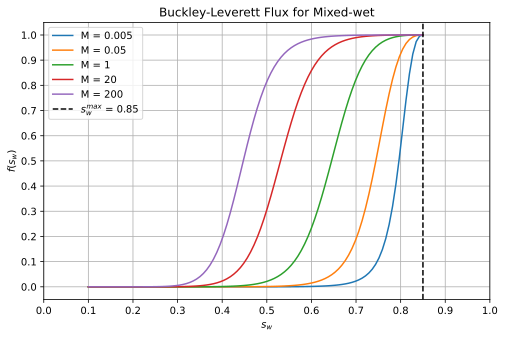

In [7]:
mixed_wet_setup = BuckleyLeverett(
    wettability="Mixed-wet",
    a=8,
    b=2.5,
    c=0.3,
    k_rw_max=0.5,
    k_ro_max=1,
    s_or=0.15,
    s_wc=0.1,
    s_w_cross=0.64,
    s_w_asterisco=0.5,
    p_c_max=100,
    M=0.005,
    s_w_i=0,
    s_w_domain_max=0.85
)
values_by_m = plot_flux_multiple_m(
    buckley_leverett=mixed_wet_setup
)

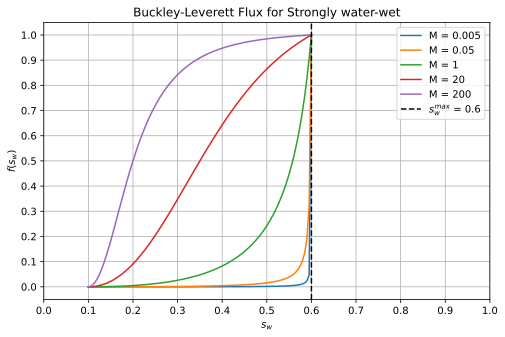

In [8]:
strongly_wet_setup = BuckleyLeverett(
    wettability="Strongly water-wet",
    a=2,
    b=1,
    c=0.3,
    k_rw_max=0.1,
    k_ro_max=1,
    s_or=0.4,
    s_wc=0.1,
    s_w_cross=0.55,
    s_w_asterisco=0.6,
    p_c_max=200,
    M=0.005,
    s_w_i=0,
    s_w_domain_max=0.6
)
values_by_m = plot_flux_multiple_m(
    buckley_leverett=strongly_wet_setup,
)

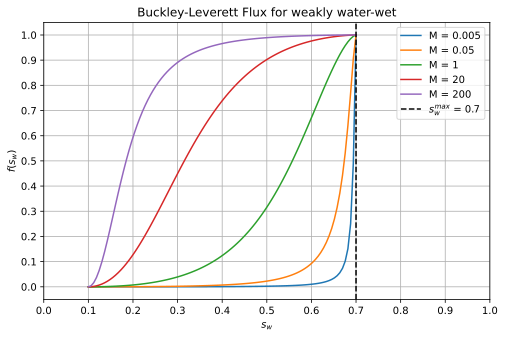

In [9]:
weakly_wet_setup = BuckleyLeverett(
    wettability="weakly water-wet",
    a=2,
    b=1.5,
    c=0.3,
    k_rw_max=0.2,
    k_ro_max=1,
    s_or=0.3,
    s_wc=0.1,
    s_w_cross=0.55,
    s_w_asterisco=0.6,
    p_c_max=200,
    M=0.005,
    s_w_i=0,
    s_w_domain_max=0.7,
)
values_by_m = plot_flux_multiple_m(
    buckley_leverett=weakly_wet_setup,
)

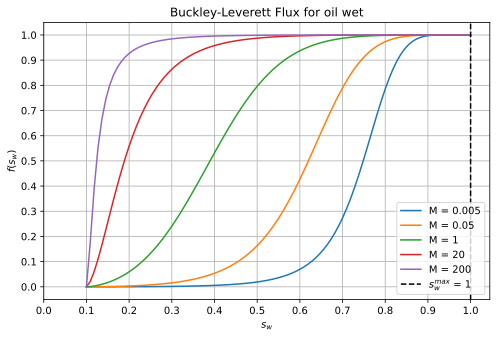

In [10]:
oil_wet_setup = BuckleyLeverett(
    wettability="oil wet",
    a=1.5,
    b=4,
    c=0.3,
    k_rw_max=0.95,
    k_ro_max=1,
    s_or=0.05,
    s_wc=0.1,
    s_w_cross=0.39,
    s_w_asterisco=0.1,
    p_c_max=100,
    M=0.005,
    s_w_i=0,
    s_w_domain_max=1
)
values_by_m = plot_flux_multiple_m(
    buckley_leverett=oil_wet_setup,
)

Again the third plot above shows $q$ on the vertical axis and $f'(q)$ on the horizontal axis (it's the middle figure turned sideways).  You can think of this as showing the characteristic velocity for each point on a jump discontinuity from $q=0$ to $q=1$ (indicated by the dashed line), and hence a triple valued solution of the Riemann problem at $t=1$ when each $q$ value has propagated this far.

### The correct Riemann solution

Below we show this triple-valued solution together with the correct solution to the Riemann problem, with a shock wave inserted at the appropriate point (as computed using the Osher solution defined above).  Note that for this non-convex flux function the Riemann solution consists partly of a rarefaction wave together with a shock wave.

In the plot on the right, we also show the flux function $f(q)$ as a red curve and the upper boundary of the convex hull of the set of points below the graph for $q_r \leq q \leq q_\ell$.  Note that the convex hull boundary follows the flux function for the set of $q$ values corresponding to the rarefaction wave and then jumps from $q\approx 0.6$ to $q=0$, corresponding to the shock wave.  See Section 16.1 of <cite data-cite="fvmhp"><a href="riemann.html#fvmhp">(LeVeque 2002)</a></cite> for more discussion of this construction of the Riemann solution.

In [11]:
setup = copy.deepcopy(mixed_wet_setup)
setup.M = 200
plot_function = nonconvex_demos.make_plot_function(
    setup.flux, 
    setup.s_w_domain_max,
    setup.s_w_domain_min,
    xi_left=0,
    xi_right=100
)

interact(plot_function, 
         t=widgets.FloatSlider(value=0,min=0,max=10),
         fig=fixed(0));

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0), Output()), _dom_classes=('widget-inte…

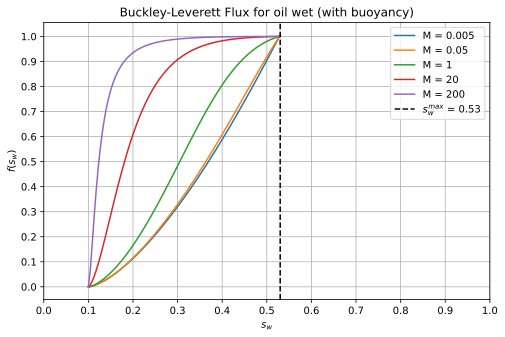

In [18]:
oil_wet_setup = BuckleyLeverett(
    wettability="oil wet",
    a=1.5,
    b=4,
    c=0.3,
    k_rw_max=0.95,
    k_ro_max=1,
    s_or=0.05,
    s_wc=0.1,
    s_w_cross=0.39,
    s_w_asterisco=0.1,
    p_c_max=100,
    M=0.005,
    s_w_i=0,
    s_w_domain_max=0.53
)
values_by_m = plot_flux_multiple_m(
    buckley_leverett=oil_wet_setup,
    consider_buoyancy=True
)

Note from the plot on the left above that the triple-valued solution suggested by tracing characteristics (the dashed line) has been partially replaced by a shock wave.  By conservation, the areas of the two regions cut off by the shock must cancel out.  Moreover, the shock speed coincides with the characteristic speed at the edge of the rarefaction wave that ends at the shock.  In terms of the flux function shown by the dashed curve in the right-most figure above, we see that the shock wave connects $q_r=0$ to the point where the slope of the linear segment of the solid line (which is the shock speed, by the Rankine-Hugoniot condition) agrees with the slope of the flux function (which is the characteristic speed at this edge of the rarefaction wave).

Note that the correct Riemann solution lies along the upper *convex hull* of the flux function (i.e., the convex hull of the region below the curve $f(q)$).  We will see below that this is true more generally, even for flux functions with many local maxima or minima.  If $q_\ell > q_r$ then the upper convex hull of the flux function between these points illustrates the Riemann solution.  On the other hand, if $q_\ell < q_r$ then the lower convex hull gives the Riemann solution, as illustrated in the next example.

## Implications for systems of equations

For hyperoblic systems of $m$ equations, there are $m$ different characteristic fields. For classical nonlinear systems such as the shallow water equations or the Euler equations of gas dynamics, the Riemann solution generally consists of $m$ waves, each of which is either a discontinuity or a rarefaction wave.  The fact that there is only one wave in each family results from the fact that, for these systems, each characteristic speed either varies monotonically through the wave (the field is said to be *genuinely nonlinear*) or else is constant across the wave (in which case the field is called *linearly degenerate*).  In the former case the wave is either a single shock or rarefaction wave, and in the latter case the wave is a "contact discontinuity", as discussed further in [Shallow_tracer](Shallow_tracer.ipynb) and [Euler](Euler.ipynb).  As in the case of scalar advection, the characteristic speed is constant across a contact discontinuity ($f'(q) \equiv 0$ between the left and right states). The definition of genuine nonlinearity and linear degeneracy for systems of equations is given in [Shallow_tracer](Shallow_tracer.ipynb).

The nonconvex equations studied in this chapter illustrate that even for a *scalar* problem the Riemann solution becomes much more complicated if the problem fails to be genuinely nonlinear (e.g. Burgers' equation or the LWR model for traffic flow) or linearly degenerate (the advection equation).  *Systems* of equations that lack the corresponding properties are more difficult still and are beyond the scope of this book, although they do arise in some important applications, such as magnetohydrodynamics (MHD).